In [3]:
from matplotlib import pyplot as plt
import numpy as np
import os

In [2]:
def plot_band(ax, x, y, band_scale=0, label=None, color=None):
    """Plot mean and min-to-max color band for stacked data y.

    Parameters
    ----------
    ax : plt.axes.Axes
        Target plot.
    x : np.array
        x data array, with shape (time).
    y : np.array
        y data array, with shape (trajectory idx, time).

    Keyword Args
    ------------
    band_scale : float
        Lower and upper band variance multiplier. If 0, uses min/max instead.
    label : str
        Line label for legend.
    color : str
        Line/shading color.
    """

    mean = np.mean(y, axis=0)

    if band_scale == 0:
        lower = np.min(y, axis=0)
        upper = np.max(y, axis=0)
    else:
        stddev = np.sqrt(np.var(y, axis=0))
        mean = np.mean(y, axis=0)
        lower = mean - band_scale * stddev
        upper = mean + band_scale * stddev

    mean_line, = ax.plot(x, mean, label=label, color=color)
    ax.fill_between(x, lower, upper, alpha=0.25, color=mean_line.get_color())
    return mean_line


In [85]:
experiments = [
    "mf_linear", "mf_nn_8", "mf_nn_32",
    "mf_opcodes_8", "mf_opcodes_32",
    "mf_pca_8", "mf_pca_32",
    "mf_both_8", "mf_both_32"
]
sparsity = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]

data = {
    k: [np.load(
        os.path.join("results", k, "{}.npz".format(s))) for s in sparsity]
    for k in experiments
}
val_last = {
    k: np.array([p['val'][:, -1] for p in v]) for k, v in data.items()
}
train_last = {
    k: np.array([p['train'][:, -1] for p in v]) for k, v in data.items()
}

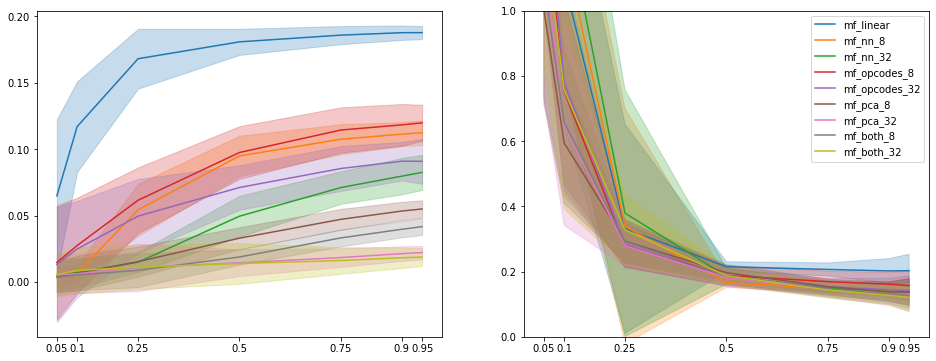

In [86]:
def ablate(ax, data):
    for experiment, val in data.items():
        plot_band(ax, sparsity, np.sqrt(val).T, band_scale=2, label=experiment)
        ax.set_xticks(sparsity)
        ax.set_xticklabels(sparsity)
        ax.set_xlim(0, 1)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

ablate(axs[0], train_last)
ablate(axs[1], val_last)
axs[1].set_ylim(0, 1.0)
axs[1].legend()

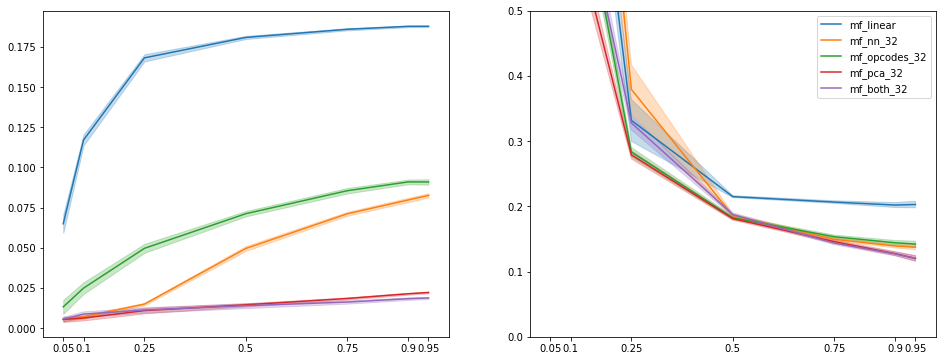

In [88]:
def ablate(ax, data):
    for experiment in ["mf_linear", "mf_nn_32", "mf_opcodes_32", "mf_pca_32", "mf_both_32"]:
        plot_band(ax, sparsity, np.sqrt(data[experiment]).T, band_scale=0.2, label=experiment)
        ax.set_xticks(sparsity)
        ax.set_xticklabels(sparsity)
        ax.set_xlim(0, 1)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

ablate(axs[0], train_last)
ablate(axs[1], val_last)
axs[1].set_ylim(0, 0.5)
axs[1].legend()